# <span style="color:purple"><center>Exploratory Data Analysis on Twitter Share Market

# Importing Librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from IPython.display import display

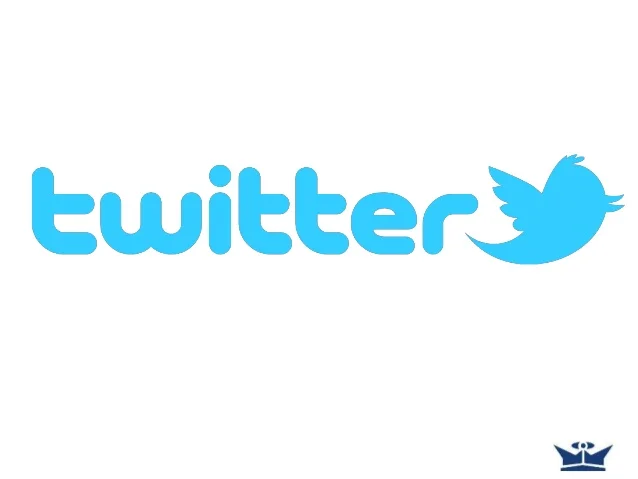

# Importing file

In [2]:
df=pd.read_csv("TWTR.csv")

## DataFrame

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-09,45.590000,49.840000,45.020000,49.139999,49.139999,17366614
1,2013-12-10,48.900002,52.580002,48.700001,51.990002,51.990002,25792002
2,2013-12-11,52.400002,53.869999,51.000000,52.340000,52.340000,26631535
3,2013-12-12,52.200001,55.869999,50.689999,55.330002,55.330002,23446870
4,2013-12-13,56.200001,59.410000,55.450001,59.000000,59.000000,38979567
...,...,...,...,...,...,...,...
2233,2022-10-21,50.000000,50.750000,49.549999,49.889999,49.889999,51209029
2234,2022-10-24,50.709999,51.860001,50.520000,51.520000,51.520000,22987553
2235,2022-10-25,52.415001,53.180000,52.200001,52.779999,52.779999,35077848
2236,2022-10-26,52.950001,53.500000,52.770000,53.349998,53.349998,28064973


## Information about dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2238 non-null   object 
 1   Open       2238 non-null   float64
 2   High       2238 non-null   float64
 3   Low        2238 non-null   float64
 4   Close      2238 non-null   float64
 5   Adj Close  2238 non-null   float64
 6   Volume     2238 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 122.5+ KB


## Dropping column 

In [5]:
#Dropping column because adj close and close same
df=df.drop('Adj Close',axis=1)

In [6]:
df

,Date,Open,High,Low,Close,Volume
0,2013-12-09,45.590000,49.840000,45.020000,49.139999,17366614
1,2013-12-10,48.900002,52.580002,48.700001,51.990002,25792002
2,2013-12-11,52.400002,53.869999,51.000000,52.340000,26631535
3,2013-12-12,52.200001,55.869999,50.689999,55.330002,23446870
4,2013-12-13,56.200001,59.410000,55.450001,59.000000,38979567
...,...,...,...,...,...,...
2233,2022-10-21,50.000000,50.750000,49.549999,49.889999,51209029
2234,2022-10-24,50.709999,51.860001,50.520000,51.520000,22987553
2235,2022-10-25,52.415001,53.180000,52.200001,52.779999,35077848
2236,2022-10-26,52.950001,53.500000,52.770000,53.349998,28064973


## Spliting dates

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
#taking dates as per year, month and date
df['date of year'] = df['Date'].dt.year
df['date of month'] = df['Date'].dt.month
df['date of day'] = df['Date'].dt.day
df['date of day_of_week'] = df['Date'].dt.day_of_week

## New Dataset

In [9]:
df

,Date,Open,High,Low,Close,Volume,date of year,date of month,date of day,date of day_of_week
0,2013-12-09,45.590000,49.840000,45.020000,49.139999,17366614,2013,12,9,0
1,2013-12-10,48.900002,52.580002,48.700001,51.990002,25792002,2013,12,10,1
2,2013-12-11,52.400002,53.869999,51.000000,52.340000,26631535,2013,12,11,2
3,2013-12-12,52.200001,55.869999,50.689999,55.330002,23446870,2013,12,12,3
4,2013-12-13,56.200001,59.410000,55.450001,59.000000,38979567,2013,12,13,4
...,...,...,...,...,...,...,...,...,...,...
2233,2022-10-21,50.000000,50.750000,49.549999,49.889999,51209029,2022,10,21,4
2234,2022-10-24,50.709999,51.860001,50.520000,51.520000,22987553,2022,10,24,0
2235,2022-10-25,52.415001,53.180000,52.200001,52.779999,35077848,2022,10,25,1
2236,2022-10-26,52.950001,53.500000,52.770000,53.349998,28064973,2022,10,26,2


## Describing the new dataset

In [10]:
df.describe()

,Open,High,Low,Close,Volume,date of year,date of month,date of day,date of day_of_week
count,2238.000000,2238.000000,2238.000000,2238.000000,2.238000e+03,2238.000000,2238.000000,2238.000000,2238.00000
mean,35.961396,36.635702,35.285190,35.944794,2.181679e+07,2017.885165,6.491063,15.757373,2.01966
std,14.170256,14.422235,13.881306,14.141829,1.904111e+07,2.569854,3.409165,8.742715,1.39882
min,13.950000,14.220000,13.725000,14.010000,0.000000e+00,2013.000000,1.000000,1.000000,0.00000
25%,25.402499,25.970000,24.692501,25.267500,1.247043e+07,2016.000000,4.000000,8.000000,1.00000
50%,35.264999,35.970001,34.692501,35.359999,1.703495e+07,2018.000000,6.000000,16.000000,2.00000
75%,44.209999,45.000000,43.372500,44.147501,2.429828e+07,2020.000000,9.000000,23.000000,3.00000
max,78.360001,80.750000,76.050003,77.629997,2.692131e+08,2022.000000,12.000000,31.000000,4.00000


## Minimum 

In [11]:
#Lowest  value
df[df['Low'] == 13.725000]

,Date,Open,High,Low,Close,Volume,date of year,date of month,date of day,date of day_of_week
618,2016-05-24,14.22,14.22,13.725,14.03,36221996,2016,5,24,1


In [13]:
#Minimum value at open
df[df['Open'] == 13.950000]

,Date,Open,High,Low,Close,Volume,date of year,date of month,date of day,date of day_of_week
604,2016-05-04,13.95,14.878,13.92,14.84,41674401,2016,5,4,2


In [14]:
#Minimum value at close
df[df['Close'] == 14.010000]

,Date,Open,High,Low,Close,Volume,date of year,date of month,date of day,date of day_of_week
603,2016-05-03,14.22,14.25,13.9,14.01,26034647,2016,5,3,1


In [25]:
#top 3 lowest Volume
df.nsmallest(3,'Volume')

,Date,Open,High,Low,Close,Volume,date of year,date of month,date of day,date of day_of_week
449,2015-09-22,27.049999,27.480000,26.620001,26.830000,0,2015,9,22,1
940,2017-09-01,16.969999,17.000000,16.580000,16.860001,0,2017,9,1,4
1774,2020-12-24,54.520000,55.189999,53.857201,53.970001,3661053,2020,12,24,3


## Maximum

In [17]:
#Highest value
df[df['High'] == 80.750000]

,Date,Open,High,Low,Close,Volume,date of year,date of month,date of day,date of day_of_week
1815,2021-02-25,78.150002,80.75,73.889999,74.589996,63625737,2021,2,25,3


In [18]:
#Highest opening 
df[df['Open'] == 78.360001]

,Date,Open,High,Low,Close,Volume,date of year,date of month,date of day,date of day_of_week
1817,2021-03-01,78.360001,78.730003,76.050003,77.629997,24359195,2021,3,1,0


In [19]:
#Highest closing
df[df['Close'] == 77.629997]

,Date,Open,High,Low,Close,Volume,date of year,date of month,date of day,date of day_of_week
1817,2021-03-01,78.360001,78.730003,76.050003,77.629997,24359195,2021,3,1,0


In [26]:
#Top 10 Highest Volume 
df.nlargest(10,'Volume')

,Date,Open,High,Low,Close,Volume,date of year,date of month,date of day,date of day_of_week
2094,2022-04-04,47.869999,51.369999,46.860001,49.970001,269213085,2022,4,4,0
2102,2022-04-14,48.369999,48.500000,44.720001,45.080002,258868339,2022,4,14,3
2095,2022-04-05,53.849998,54.570000,50.560001,50.980000,217520098,2022,4,5,1
703,2016-09-23,21.500000,22.889999,21.110001,22.620001,192269255,2016,9,23,4
2108,2022-04-25,51.020000,52.290001,50.240002,51.700001,176803635,2022,4,25,0
1049,2018-02-08,34.150002,35.000000,29.709999,30.180000,162434360,2018,2,8,3
2096,2022-04-06,50.035000,52.869999,49.299999,50.770000,159034747,2022,4,6,2
2103,2022-04-18,46.240002,48.730000,44.360001,48.450001,153119550,2022,4,18,0
1130,2018-06-06,39.419998,40.230000,39.209999,40.099998,147805710,2018,6,6,2
2237,2022-10-27,53.910000,54.000000,53.700001,53.700001,136345128,2022,10,27,3


## Plot of opening of market

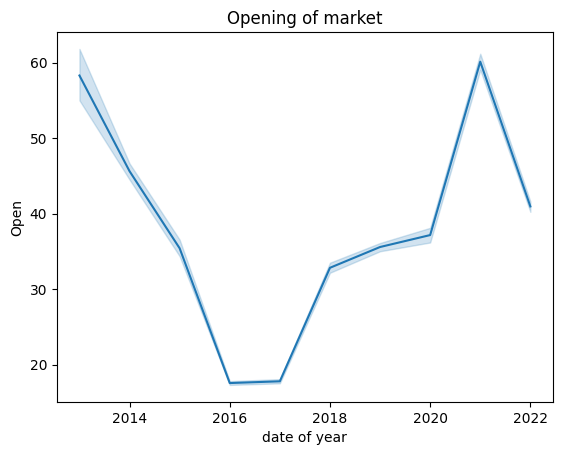

In [21]:
sns.lineplot(data=df,x="date of year",y="Open");
plt.title('Opening of market');

## Plot of closing of market

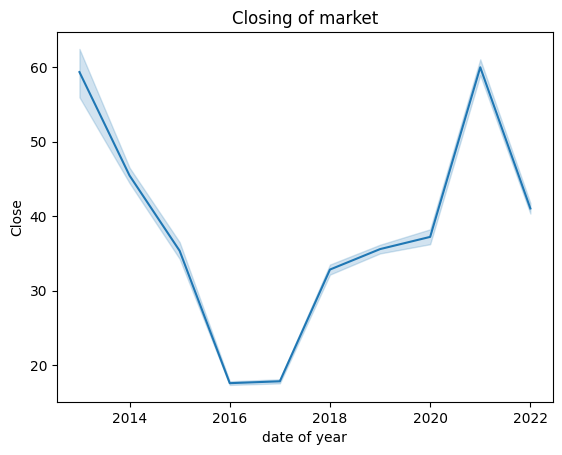

In [22]:
sns.lineplot(data=df,x="date of year",y="Close");
plt.title('Closing of market');

## Plot of Volume in Every year

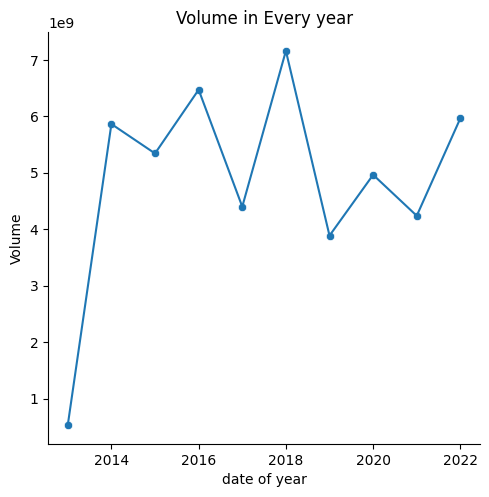

In [23]:
df2 = df.groupby('date of year')['Volume'].sum()
sns.relplot(data=df2,kind="scatter")
plt.plot(df2);
plt.title('Volume in Every year');

## Conclusion 

1) Lowest Value was on 2016-05-24 which is 13.725

2) Lowest Opening Value was on 2016-05-04 which is 13.95

3) Lowest Closeing Value was on 2016-05-03 which is 14.01

4) Lowest Volume was on 2015-09-22 and 2017-09-01 which is 0

5) Highest Value was on 2021-02-25 which is 80.75

6) Highest Opening Value was on 2021-03-01 which is 78.360001

7) Highest Closeing Value was on 2021-03-01 which is 77.629997

8) Highest Volume was on 2022-04-04 which is 269213085

9) In top 10 Volume most are from 2022 in April month

# <span style="color:red"><center>Thank You